In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crater-dataset/best.pt
/kaggle/input/crater-dataset/craters/valid/labels.cache
/kaggle/input/crater-dataset/craters/valid/labels/021_png.rf.575e0f1cb87a2cc439172de15816c2cc.txt
/kaggle/input/crater-dataset/craters/valid/labels/mars_crater--1-_png.rf.f1b399f95708fd0ce520f23c9944ed44.txt
/kaggle/input/crater-dataset/craters/valid/labels/mars_crater--91-_jpg.rf.9203caee622cf671580b91536e36e7e2.txt
/kaggle/input/crater-dataset/craters/valid/labels/mars_crater--23-_jpg.rf.ab2b0f47006c0c17260c312215dcfb88.txt
/kaggle/input/crater-dataset/craters/valid/labels/mars_crater--64-_jpg.rf.fd0838698f86dd546cdfcfea987b98b2.txt
/kaggle/input/crater-dataset/craters/valid/labels/mars_crater--29-_jpg.rf.719ff6d6c1aafd71147c173f7d224018.txt
/kaggle/input/crater-dataset/craters/valid/labels/024_png.rf.be24000681f4f356e2a027fb7ca0c552.txt
/kaggle/input/crater-dataset/craters/valid/labels/mars_crater--47-_jpg.rf.63eed086b1d39dc52405a398229dc586.txt
/kaggle/input/crater-dataset/craters/valid/lab

In [1]:
#import libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
# Read the train images
train_images_path = "/kaggle/input/crater-dataset/craters/train/images"
# create full image path for each image file
train_image_list =[os.path.join(train_images_path,f) 
               for f in os.listdir(train_images_path)
               if f.endswith(('.png', 'jpg', 'jpeg'))]

In [4]:
#check the number or images in the train_dataset
print(f"Number of images in the train_image_list:{len(train_image_list)}")

Number of images in the train_image_list:98


In [5]:
#similarly read test and valid image datasets and check the number of images in each dataset
test_images_path = "/kaggle/input/crater-dataset/craters/test/images"
test_image_list = [os.path.join(test_images_path, f)
                      for f in os.listdir(test_images_path)
                      if f.endswith(('.png', 'jpg', '.jpeg'))]

In [6]:
#check the number of images in test_dataset
print(f"Number of images in the test_image_list: {len(test_image_list)}")

Number of images in the test_image_list: 19


In [7]:
#similarly read the valid set
valid_images_path = "/kaggle/input/crater-dataset/craters/valid/images"
valid_image_list = [os.path.join(valid_images_path, f)
                      for f in os.listdir(valid_images_path)
                      if f.endswith(('.png', 'jpg', '.jpeg'))]

In [8]:
#check the number of images in valid_dataset
print(f"Number of images in the valid_image_list: {len(valid_image_list)}")

Number of images in the valid_image_list: 26


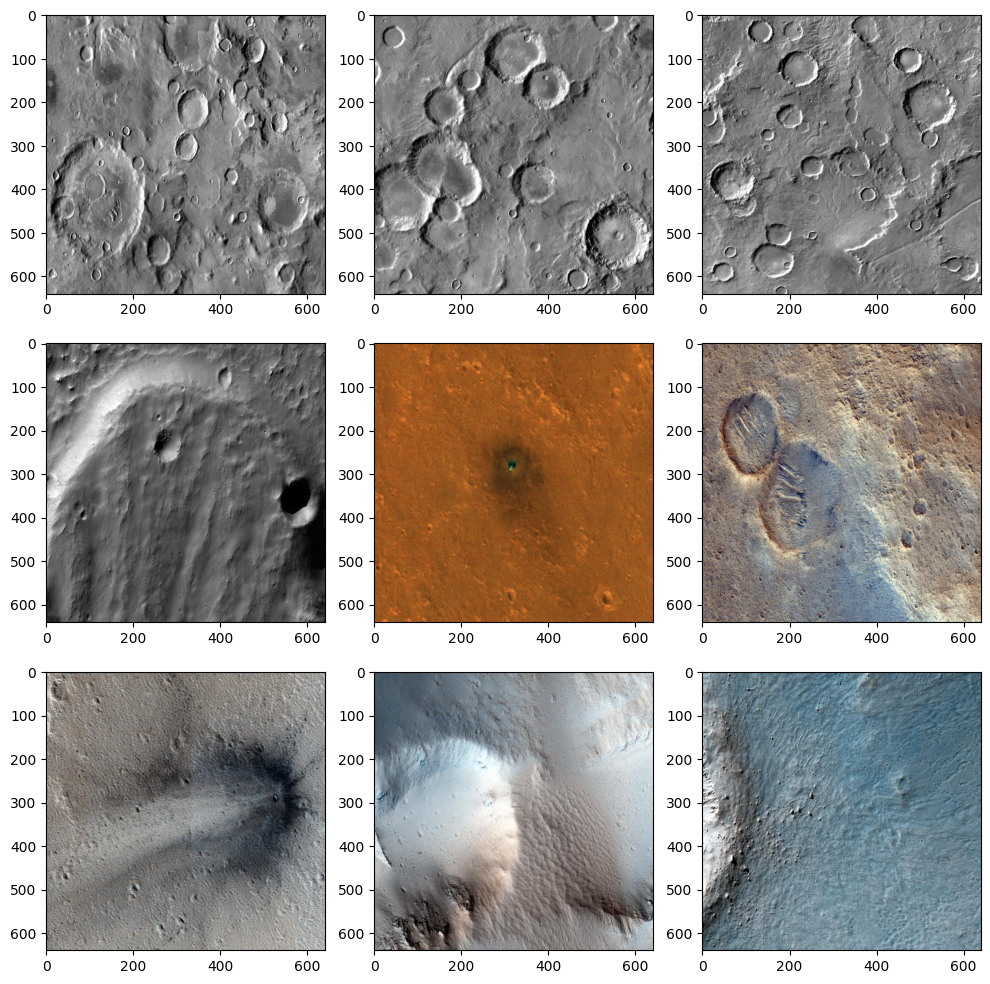

In [9]:
# visualize a few train images
plt.figure(figsize=(10,10))
for i, image_path in enumerate(train_image_list[:9]):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
plt.tight_layout()
plt.show()


In [10]:
#check the shapes of the datasets
train_image_array = np.array(train_image_list)
valid_image_array = np.array(valid_image_list)
test_image_array = np.array(test_image_list)
print(train_image_array.shape, valid_image_array.shape, test_image_array.shape)

(98,) (26,) (19,)


In [11]:
#check if images being loaded correctly
for image_path in train_image_list:
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
    else:
        print(f"Image loaded with shape:{img.shape}")

Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded with shape:(640, 640, 3)
Image loaded

In [12]:
#create a data.yaml file
import yaml
#define data straucture
data_config ={
    'train': '/kaggle/input/crater-dataset/craters/train/images',
    'val': '/kaggle/input/crater-dataset/craters/valid/images',
    'nc': 1,  # Number of classes
    'names': ['crater']  # List of class names
}
#save to a yaml file
with open('data.yaml', 'w') as file:
    yaml.dump(data_config, file, default_flow_style=False)
    
print("data.yaml file created successfully...")

data.yaml file created successfully...


In [13]:
# install ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 35.9 MB/s eta 0:00:00


In [14]:
# train the model
from ultralytics import YOLO

# Load a pretrained yolov8n model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data="/kaggle/working/data.yaml", epochs=25, imgsz=640, save=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 180MB/s]

Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False

100%|██████████| 755k/755k [00:00<00:00, 46.3MB/s]
2024-11-19 13:15:15,751	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-19 13:15:16,511	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 189MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/crater-dataset/craters/train/labels... 98 images, 9 backgrounds, 0 corrupt: 100%|██████████| 98/98 [00:00<00:00, 501.20it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/crater-dataset/craters/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/crater-dataset/craters/valid/labels... 26 images, 2 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 232.74it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/crater-dataset/craters/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.46G      1.985       3.51      1.516          8        640: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         26        202     0.0119       0.46     0.0521     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.36G      1.636      2.864      1.343         44        640: 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all         26        202     0.0187      0.723       0.13     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.43G      1.557      1.863      1.251         15        640: 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         26        202      0.021      0.812      0.148     0.0753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.52G      1.576       1.83      1.249          9        640: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         26        202     0.0219      0.847      0.183      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.42G      1.422      1.551      1.186         12        640: 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         26        202      0.881       0.11      0.306      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.52G      1.566      1.535      1.341          6        640: 100%|██████████| 7/7 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         26        202      0.885     0.0764      0.265      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.45G      1.531      1.709      1.255          5        640: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all         26        202      0.813      0.129       0.32      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.42G      1.608      1.675      1.266          6        640: 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         26        202      0.829      0.144      0.452      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.45G      1.405      1.453      1.174         52        640: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         26        202       0.57      0.252      0.357      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.41G      1.455      1.419      1.211         22        640: 100%|██████████| 7/7 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         26        202      0.562      0.273      0.364      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.51G      1.476      1.524      1.228         14        640: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         26        202      0.619      0.238      0.362      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.44G      1.389      1.352       1.16         20        640: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         26        202      0.291      0.255        0.2      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.54G      1.381       1.38      1.176         14        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         26        202      0.223      0.249      0.189      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.54G      1.437      1.341      1.191         22        640: 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         26        202      0.298      0.351      0.279      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.41G      1.417      1.407      1.202          5        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         26        202      0.634      0.515      0.567       0.31
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.43G      1.426      1.426       1.18         23        640: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         26        202      0.554      0.505      0.531      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.45G      1.396      1.442      1.165         17        640: 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         26        202      0.396       0.49      0.379      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.43G      1.684      3.008      1.233          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         26        202      0.453      0.553      0.446      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.36G      1.422      1.428      1.124         14        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         26        202      0.611      0.614      0.641      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.42G      1.352      1.364      1.139         17        640: 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         26        202      0.632      0.653      0.642      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.45G      1.373      1.318      1.154          5        640: 100%|██████████| 7/7 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         26        202      0.617      0.663      0.644      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.37G      1.339      1.225      1.147         25        640: 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         26        202       0.59      0.668      0.637      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.42G      1.358      1.229      1.129          5        640: 100%|██████████| 7/7 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         26        202      0.693      0.559       0.65      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.42G       1.28      1.214      1.085         14        640: 100%|██████████| 7/7 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         26        202       0.66      0.579      0.673      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.42G      1.268      1.363      1.123          3        640: 100%|██████████| 7/7 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         26        202      0.654      0.604      0.683      0.381



25 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         26        202      0.654      0.604      0.683      0.381
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9909ca5780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
#validate the model

# Load the trained model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # Replace 'best.pt' with the path to your trained model

# Validate the model
results = model.val(data='/kaggle/working/data.yaml', save=True)  # Replace with the path to your data.yaml file



In [16]:
# test the model 

from ultralytics import YOLO

# Load the trained model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # Replace 'best.pt' with your trained model path

# Test the model on the test set
results = model.predict(source='/kaggle/input/crater-dataset/craters/test/images', conf=0.25, save=True)

# Display the predictions
print("Test Predictions:")
for result in results:
    print(f"Image: {result.path}, Objects Detected: {len(result.boxes)}")



image 1/19 /kaggle/input/crater-dataset/craters/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg: 640x640 20 craters, 6.3ms
image 2/19 /kaggle/input/crater-dataset/craters/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg: 640x640 10 craters, 6.2ms
image 3/19 /kaggle/input/crater-dataset/craters/test/images/019_png.rf.1930cd277f9bf0e3fa57f2dcfee0385f.jpg: 640x640 4 craters, 5.9ms
image 4/19 /kaggle/input/crater-dataset/craters/test/images/04_png.rf.81a7d6cbeb9dc09e5a8ecd40e185fc92.jpg: 640x640 8 craters, 6.2ms
image 5/19 /kaggle/input/crater-dataset/craters/test/images/mars_crater--100-_jpg.rf.a2ad5867efb2d73e86d9d980ca40a9fe.jpg: 640x640 9 craters, 5.9ms
image 6/19 /kaggle/input/crater-dataset/craters/test/images/mars_crater--108-_jpg.rf.9395f473f249e064dbfea078e2519a17.jpg: 640x640 8 craters, 6.2ms
image 7/19 /kaggle/input/crater-dataset/craters/test/images/mars_crater--116-_jpg.rf.2e550a693a8800808e68848484716b95.jpg: 640x640 7 craters, 6.2ms
image 8/19 /kaggle

In [ ]:
#save and export the model
model.export(format="onnx")  # Export to ONNX format for deployment


In [19]:
# delete the results generated by the first model
import shutil
# specify the directory and its contents
results_dir = "runs"
# delete the directory and its contents
shutil.rmtree(results_dir, ignore_errors=True)

In [22]:
#Tuning of hyperparameters to get better result(improve mAP)
#Train the model with augment set true
#Load the pretrained yolov8n model
model_augment = YOLO('yolov8n.pt')
#train the model with augment setting true
model_augment.train(data='/kaggle/working/data.yaml', epochs=50, imgsz=640, augment=True, save=True)

Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /kaggle/input/crater-dataset/craters/train/labels... 98 images, 9 backgrounds, 0 corrupt: 100%|██████████| 98/98 [00:00<00:00, 576.62it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/crater-dataset/craters/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/crater-dataset/craters/valid/labels... 26 images, 2 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 402.51it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/crater-dataset/craters/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.47G      1.985       3.51      1.516          8        640: 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         26        202     0.0119       0.46     0.0521     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.36G      1.638      2.857      1.344         44        640: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         26        202     0.0185      0.713      0.129      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.43G       1.56      1.847      1.256         15        640: 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         26        202     0.0209      0.807      0.171     0.0903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.52G      1.579      1.806      1.242          9        640: 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         26        202     0.0269      0.554      0.216      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.43G      1.401      1.533      1.166         12        640: 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         26        202      0.825       0.14      0.292      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.52G      1.522      1.519      1.269          6        640: 100%|██████████| 7/7 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         26        202      0.802        0.1      0.224      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.46G       1.56      1.702      1.263          5        640: 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         26        202      0.395      0.134      0.154      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.42G      1.609      1.678      1.272          6        640: 100%|██████████| 7/7 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         26        202       0.43      0.124      0.173     0.0881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.45G      1.429      1.471      1.197         52        640: 100%|██████████| 7/7 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         26        202      0.377      0.257      0.315      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.42G      1.479      1.478      1.234         22        640: 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         26        202      0.457      0.267      0.332      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.51G      1.528      1.563      1.257         14        640: 100%|██████████| 7/7 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         26        202       0.13      0.238       0.12     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.44G      1.422      1.416      1.166         20        640: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         26        202      0.125      0.431      0.111     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.54G      1.424      1.397      1.193         14        640: 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         26        202      0.281      0.386      0.267      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.54G      1.444      1.393      1.201         22        640: 100%|██████████| 7/7 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         26        202      0.527      0.435      0.448       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G      1.447      1.446      1.225          5        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         26        202      0.561      0.574      0.557       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.44G      1.393      1.346      1.201         19        640: 100%|██████████| 7/7 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         26        202      0.552      0.599      0.547      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.45G      1.383        1.4      1.154         14        640: 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         26        202      0.555      0.554      0.545      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.42G      1.359      1.321      1.171         37        640: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         26        202      0.522      0.561      0.529       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.5G      1.317      1.244      1.146         61        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         26        202      0.638      0.401      0.513      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G      1.368      1.256      1.157         21        640: 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         26        202      0.461      0.529      0.513      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.44G      1.363      1.212      1.154         19        640: 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


                   all         26        202      0.549      0.525      0.581       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.44G      1.343      1.191      1.134         57        640: 100%|██████████| 7/7 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         26        202      0.619      0.579      0.642      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.44G      1.356      1.153      1.142         29        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         26        202      0.603      0.584      0.643      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.43G      1.411      1.189      1.176         19        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         26        202      0.585      0.564      0.611      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.45G      1.333      1.241      1.113          9        640: 100%|██████████| 7/7 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         26        202      0.601      0.574      0.608      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G       1.34      1.196      1.163         14        640: 100%|██████████| 7/7 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         26        202      0.603      0.618      0.622      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.41G      1.375       1.12      1.189         26        640: 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         26        202      0.652      0.611       0.66      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.43G      1.343      1.211      1.144         17        640: 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         26        202      0.652      0.614      0.655      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.42G      1.334      1.243      1.149         10        640: 100%|██████████| 7/7 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         26        202      0.619      0.628      0.631      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.42G      1.252       1.13      1.106         32        640: 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         26        202      0.547      0.609      0.591      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.44G      1.327      1.157      1.103         16        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         26        202      0.604      0.604      0.636       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.37G      1.256      1.161      1.145          5        640: 100%|██████████| 7/7 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         26        202      0.647      0.589      0.651      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.42G      1.322      1.126      1.117         53        640: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         26        202      0.669      0.581      0.661      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.44G      1.257      1.063      1.092         29        640: 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         26        202      0.599      0.649      0.665      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.45G      1.168      1.033      1.104         14        640: 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         26        202      0.632      0.609      0.667      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.43G      1.227     0.9985      1.084         23        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         26        202      0.687      0.594      0.676      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.45G      1.084     0.9944      1.049         13        640: 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         26        202      0.676      0.619      0.678      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.45G       1.25      1.266      1.158          6        640: 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         26        202      0.732      0.589      0.679      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.42G      1.193     0.9508      1.075         20        640: 100%|██████████| 7/7 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         26        202      0.715      0.599      0.669      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.54G      1.277       1.04      1.111         21        640: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         26        202      0.647      0.609      0.653      0.365


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.43G       1.36       1.15      1.241          4        640: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         26        202      0.694      0.594      0.659      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G       1.32      1.066      1.122         20        640: 100%|██████████| 7/7 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         26        202      0.692      0.574      0.661      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.43G      1.249      1.049      1.077          9        640: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         26        202      0.737      0.554      0.665      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.37G      1.152     0.9884      1.064         22        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         26        202      0.753      0.558      0.673      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.42G      1.224      1.117      1.102          5        640: 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         26        202      0.736      0.593      0.672      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.43G      1.196     0.9636      1.059         12        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all         26        202      0.762      0.614      0.695      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.36G      1.256      1.087      1.165          7        640: 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         26        202      0.745      0.589      0.693      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.45G      1.216      1.017      1.103         20        640: 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         26        202      0.742      0.599      0.685      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.45G      1.196     0.9552       1.09         14        640: 100%|██████████| 7/7 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         26        202      0.735      0.584       0.68      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.37G      1.165      1.093      1.138          3        640: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         26        202       0.74      0.589      0.678      0.393



50 epochs completed in 0.030 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


                   all         26        202      0.735      0.645      0.719      0.419
Speed: 0.2ms preprocess, 6.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a99202b0610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [23]:
# #validate the model_augment

# Load the trained model
model_augment = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # Replace 'best.pt' with the path to your trained model

# Validate the model
results = model_augment.val(data='/kaggle/working/data.yaml', save=True)  # Replace with the path to your data.yaml file



Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/crater-dataset/craters/valid/labels... 26 images, 2 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 563.79it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/crater-dataset/craters/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


                   all         26        202      0.762      0.614      0.695      0.398
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val


In [24]:
# test the model 

from ultralytics import YOLO

# Load the trained model
model_augment = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # Replace 'best.pt' with your trained model path

# Test the model on the test set
results = model_augment.predict(source='/kaggle/input/crater-dataset/craters/test/images', conf=0.25, save=True)



image 1/19 /kaggle/input/crater-dataset/craters/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg: 640x640 25 craters, 8.6ms
image 2/19 /kaggle/input/crater-dataset/craters/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg: 640x640 12 craters, 6.7ms
image 3/19 /kaggle/input/crater-dataset/craters/test/images/019_png.rf.1930cd277f9bf0e3fa57f2dcfee0385f.jpg: 640x640 7 craters, 6.1ms
image 4/19 /kaggle/input/crater-dataset/craters/test/images/04_png.rf.81a7d6cbeb9dc09e5a8ecd40e185fc92.jpg: 640x640 13 craters, 6.0ms
image 5/19 /kaggle/input/crater-dataset/craters/test/images/mars_crater--100-_jpg.rf.a2ad5867efb2d73e86d9d980ca40a9fe.jpg: 640x640 6 craters, 6.0ms
image 6/19 /kaggle/input/crater-dataset/craters/test/images/mars_crater--108-_jpg.rf.9395f473f249e064dbfea078e2519a17.jpg: 640x640 15 craters, 5.9ms
image 7/19 /kaggle/input/crater-dataset/craters/test/images/mars_crater--116-_jpg.rf.2e550a693a8800808e68848484716b95.jpg: 640x640 8 craters, 6.2ms
image 8/19 /kagg